In [1]:
import numpy as np
import torch
import modules.evaluate as evaluate
import matplotlib
import matplotlib.pyplot as plt


modelLoads= ["AA", "AB", "BA", "BB", "infer2018"]
weightModels= ["degree", "gravity", "identical"]
randomGraphs= ["ER", "BA", "WS", "RGG"]
seeds= [10, 11, 12, 13, 14]
strains= [1, 2, 3, 4]
denses= [4, 6, 8]
nodes= [50, 100, 150]
intenses= [0, 1, 2]
identicalfs= [0.005, 0.01, 0.02]

commands1=set()
linuxThread= 3

In [2]:
def continious_to_sparcity(my_array, top= 400):
    # Flatten the array to a 1D array
    flat_array = my_array.flatten()

    # Sort the flattened array in descending order
    sorted_indices = np.argsort(flat_array)[::-1]

    # Set the top 400 elements to 1 and the rest to 0
    flat_array[sorted_indices[:top]] = 1
    flat_array[sorted_indices[top:]] = 0

    # Reshape the modified 1D array back to the original shape
    result_array = flat_array.reshape(my_array.shape)
    return result_array

def continious_to_sparcity_cols(my_matrix, topRow= 8):

    result_matrix = np.zeros_like(my_matrix)
    indices = np.argsort(my_matrix, axis=1)[:, -topRow:]  # Get indices of top 8 elements in each row
    row_indices = np.arange(my_matrix.shape[0])[:, None]  # Row indices to broadcast
    result_matrix[row_indices, indices] = 1
    
    return result_matrix

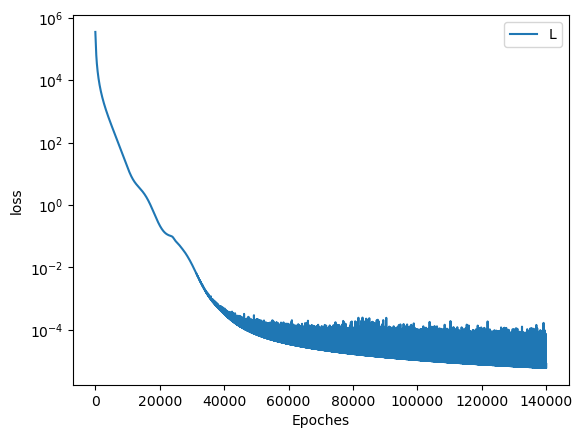

In [3]:
identicalf= 0.01
node= 50
strain= 4

fileName= f"results/AA/AA_GEO_identical_{11}_{strain}_0_8_50_{identicalf*1000}_140000.npz"
IMatrix= torch.eye(node, device= "cpu")
npzfile = np.load(fileName)
loss= npzfile['loss']
taus= npzfile["taus"]

plt.plot(loss)
plt.yscale("log")
plt.xlabel("Epoches")
plt.ylabel("loss")
plt.legend("Loss")



In [55]:

identicalf= 0.01
node= 50
strain= 4
#Performance on different strains

for randomGraph in randomGraphs:
    cosinesList= []
    spectralsList= []
    edgesList= []
    jaccardsList= []
    for modelLoad in modelLoads:
        cosines= 0
        spectrals= 0
        edges= 0
        jaccards= 0
        minus= 0
        for seed in seeds:
            try:
                if modelLoad=="AA":
                    fileName= f"results/AA/AA_{randomGraph}_identical_{seed}_{strain}_0_8_50_{identicalf*1000}_140000.npz"
                else:
                    fileName= f"results/{modelLoad}/{modelLoad}_{randomGraph}_identical_{seed}_{strain}_0_100000.npz"
                IMatrix= torch.eye(node, device= "cpu")
                npzfile = np.load(fileName)
            except:
                #print(fileName)
                minus+=1
                continue
            # Access the arrays in the NPZ file
            Awnp= npzfile['A']
            PreAnp= npzfile['Apre']
            Aw = torch.tensor(Awnp)
            PreA = torch.tensor(PreAnp)
            links= int(torch.sum(Aw)/identicalf)  
            Aws= torch.tensor(continious_to_sparcity(Awnp, links))+IMatrix
            PreAs= torch.tensor(continious_to_sparcity(PreAnp, links))+IMatrix
            cosines+= evaluate.cosine_similarity(Aw, PreA)
            spectrals+= evaluate.spectral_analysis(Aw, PreA)
            edges+= evaluate.edge_correctness(Aws, PreAs)
            jaccards+= evaluate.jaccard_index(Aws, PreAs)
        cosines/= len(seeds)-minus
        spectrals/= len(seeds)-minus
        edges/= len(seeds)-minus
        jaccards/= len(seeds)-minus
        cosinesList.append(f"{cosines:.2f}")
        spectralsList.append(f"{spectrals:.2f}")
        edgesList.append(f"{edges:.2f}")
        jaccardsList.append(f"{jaccards:.2f}")
        #print(f"{cosines:.2f}\t{spectrals:.2f}\t{edges:.2f}\t{jaccards:.2f}", end="\t")
    print("\t".join(cosinesList)+"\t"+"\t".join(spectralsList)+"\t"+"\t".join(edgesList)+"\t"+"\t".join(jaccardsList))
    #print()

0.74	0.55	0.33	0.56	0.57	0.51	0.60	0.49	0.46	0.58	0.69	0.38	0.38	0.56	0.57	0.52	0.23	0.23	0.39	0.40
0.77	0.51	0.33	0.53	0.55	0.49	0.63	0.54	0.49	0.53	0.74	0.35	0.37	0.57	0.58	0.59	0.21	0.23	0.40	0.41
0.77	0.56	0.34	0.60	0.61	0.70	0.59	0.67	0.68	0.64	0.75	0.39	0.39	0.62	0.61	0.60	0.25	0.24	0.45	0.44
0.93	0.64	0.47	0.58	0.60	0.93	0.74	0.79	0.85	0.82	0.97	0.52	0.52	0.74	0.75	0.95	0.35	0.35	0.59	0.60


In [48]:

identicalf= 0.01
node= 50
#Performance on different strains

for randomGraph in randomGraphs:
    cosinesList= []
    spectralsList= []
    edgesList= []
    jaccardsList= []
    for strain in strains:
        cosines= 0
        spectrals= 0
        edges= 0
        jaccards= 0
        for seed in seeds:
            try:
                fileName= f"results/AA/AA_{randomGraph}_identical_{seed}_{strain}_0_8_50_{identicalf*1000}_140000.npz"
                IMatrix= torch.eye(node, device= "cpu")
                npzfile = np.load(fileName)
            except:
                print(fileName)
                continue
            # Access the arrays in the NPZ file
            Awnp= npzfile['A']
            PreAnp= npzfile['Apre']
            Aw = torch.tensor(Awnp)
            PreA = torch.tensor(PreAnp)
            links= int(torch.sum(Aw)/identicalf)  
            Aws= torch.tensor(continious_to_sparcity(Awnp, links))+IMatrix
            PreAs= torch.tensor(continious_to_sparcity(PreAnp, links))+IMatrix
            cosines+= evaluate.cosine_similarity(Aw, PreA)
            spectrals+= evaluate.spectral_analysis(Aw, PreA)
            edges+= evaluate.edge_correctness(Aws, PreAs)
            jaccards+= evaluate.jaccard_index(Aws, PreAs)
        cosines/= len(seeds)
        spectrals/= len(seeds)
        edges/= len(seeds)
        jaccards/= len(seeds)
        cosinesList.append(f"{cosines:.2f}")
        spectralsList.append(f"{spectrals:.2f}")
        edgesList.append(f"{edges:.2f}")
        jaccardsList.append(f"{jaccards:.2f}")
        #print(f"{cosines:.2f}\t{spectrals:.2f}\t{edges:.2f}\t{jaccards:.2f}", end="\t")
    print("\t".join(cosinesList)+"\t"+"\t".join(spectralsList)+"\t"+"\t".join(edgesList)+"\t"+"\t".join(jaccardsList))
    #print()

0.62	0.68	0.71	0.74	0.52	0.51	0.55	0.51	0.52	0.60	0.65	0.69	0.35	0.43	0.48	0.52
0.64	0.70	0.73	0.77	0.58	0.52	0.51	0.49	0.59	0.64	0.69	0.74	0.42	0.48	0.52	0.59
0.63	0.71	0.73	0.77	0.58	0.62	0.63	0.70	0.55	0.65	0.68	0.75	0.38	0.49	0.52	0.60
0.76	0.84	0.90	0.93	0.82	0.87	0.94	0.93	0.75	0.84	0.93	0.97	0.60	0.74	0.87	0.95


In [30]:
IMatrix= torch.eye(50, device= "cpu")
identicalf= 0.01
#Performance on different dense

for randomGraph in randomGraphs:
    cosinesList= []
    spectralsList= []
    edgesList= []
    jaccardsList= []
    for dense in denses:
        cosines= 0
        spectrals= 0
        edges= 0
        jaccards= 0
        for seed in seeds:
            try:
                fileName= f"results/AA/AA_{randomGraph}_identical_{seed}_{4}_0_{dense}_50_{0.01*1000}_140000.npz"
                npzfile = np.load(fileName)
                # Access the arrays in the NPZ file
                Awnp= npzfile['A']
                PreAnp= npzfile['Apre']
                Aw = torch.tensor(Awnp)
                PreA = torch.tensor(PreAnp)
                links= int(torch.sum(Aw)/identicalf)  
                Aws= torch.tensor(continious_to_sparcity(Awnp, links))+IMatrix
                PreAs= torch.tensor(continious_to_sparcity(PreAnp, links))+IMatrix
                cosines+= evaluate.cosine_similarity(Aw, PreA)
                spectrals+= evaluate.spectral_analysis(Aw, PreA)
                edges+= evaluate.edge_correctness(Aws, PreAs)
                jaccards+= evaluate.jaccard_index(Aws, PreAs)
            except:
                print(fileName)
                pass
        cosines/= len(seeds)
        spectrals/= len(seeds)
        edges/= len(seeds)
        jaccards/= len(seeds)
        cosinesList.append(f"{cosines:.2f}")
        spectralsList.append(f"{spectrals:.2f}")
        edgesList.append(f"{edges:.2f}")
        jaccardsList.append(f"{jaccards:.2f}")
        #print(f"{cosines:.2f}\t{spectrals:.2f}\t{edges:.2f}\t{jaccards:.2f}", end="\t")
    print("\t".join(cosinesList)+"\t"+"\t".join(spectralsList)+"\t"+"\t".join(edgesList)+"\t"+"\t".join(jaccardsList))


0.76	0.73	0.74	0.23	0.52	0.51	0.74	0.69	0.69	0.59	0.52	0.52
0.83	0.77	0.77	0.39	0.48	0.49	0.82	0.75	0.74	0.70	0.60	0.59
0.81	0.76	0.77	0.53	0.59	0.70	0.80	0.74	0.75	0.67	0.58	0.60
0.96	0.95	0.93	0.86	0.91	0.93	0.98	0.98	0.97	0.96	0.97	0.95


In [34]:

identicalf= 0.01
node= 50
#Performance on different node number

for randomGraph in randomGraphs:
    cosinesList= []
    spectralsList= []
    edgesList= []
    jaccardsList= []
    for node in nodes:
        cosines= 0
        spectrals= 0
        edges= 0
        jaccards= 0
        for seed in seeds:
            fileName= f"results/AA/AA_{randomGraph}_identical_{seed}_{4}_0_8_{node}_{0.01*1000}_140000.npz"
            IMatrix= torch.eye(node, device= "cpu")
            npzfile = np.load(fileName)
            # Access the arrays in the NPZ file
            Awnp= npzfile['A']
            PreAnp= npzfile['Apre']
            Aw = torch.tensor(Awnp)
            PreA = torch.tensor(PreAnp)
            links= int(torch.sum(Aw)/identicalf)  
            Aws= torch.tensor(continious_to_sparcity(Awnp, links))+IMatrix
            PreAs= torch.tensor(continious_to_sparcity(PreAnp, links))+IMatrix
            cosines+= evaluate.cosine_similarity(Aw, PreA)
            spectrals+= evaluate.spectral_analysis(Aw, PreA)
            edges+= evaluate.edge_correctness(Aws, PreAs)
            jaccards+= evaluate.jaccard_index(Aws, PreAs)
        cosines/= len(seeds)
        spectrals/= len(seeds)
        edges/= len(seeds)
        jaccards/= len(seeds)
        cosinesList.append(f"{cosines:.2f}")
        spectralsList.append(f"{spectrals:.2f}")
        edgesList.append(f"{edges:.2f}")
        jaccardsList.append(f"{jaccards:.2f}")
        print(f"{cosines:.2f}\t{spectrals:.2f}\t{edges:.2f}\t{jaccards:.2f}", end="\t")
    #print("\t".join(cosinesList)+"\t"+"\t".join(spectralsList)+"\t"+"\t".join(edgesList)+"\t"+"\t".join(jaccardsList))
    print()


0.74	0.51	0.69	0.52	0.57	0.46	0.49	0.32	0.49	0.28	0.41	0.26	
0.77	0.49	0.74	0.59	0.65	0.38	0.60	0.43	0.58	0.37	0.53	0.36	
0.77	0.70	0.75	0.60	0.66	0.54	0.61	0.45	0.61	0.50	0.55	0.38	
0.93	0.93	0.97	0.95	0.92	0.89	0.96	0.93	0.93	0.86	0.96	0.93	


In [37]:

identicalf= 0.01
node= 50
#Performance on different intense

for randomGraph in randomGraphs:
    cosinesList= []
    spectralsList= []
    edgesList= []
    jaccardsList= []
    for intense in intenses:
        cosines= 0
        spectrals= 0
        edges= 0
        jaccards= 0
        for seed in seeds:
            fileName= f"results/AA/AA_{randomGraph}_identical_{seed}_{4}_{intense}_8_50_{identicalf*1000}_140000.npz"
            IMatrix= torch.eye(node, device= "cpu")
            npzfile = np.load(fileName)
            # Access the arrays in the NPZ file
            Awnp= npzfile['A']
            PreAnp= npzfile['Apre']
            Aw = torch.tensor(Awnp)
            PreA = torch.tensor(PreAnp)
            links= int(torch.sum(Aw)/identicalf)  
            Aws= torch.tensor(continious_to_sparcity(Awnp, links))+IMatrix
            PreAs= torch.tensor(continious_to_sparcity(PreAnp, links))+IMatrix
            cosines+= evaluate.cosine_similarity(Aw, PreA)
            spectrals+= evaluate.spectral_analysis(Aw, PreA)
            edges+= evaluate.edge_correctness(Aws, PreAs)
            jaccards+= evaluate.jaccard_index(Aws, PreAs)
        cosines/= len(seeds)
        spectrals/= len(seeds)
        edges/= len(seeds)
        jaccards/= len(seeds)
        cosinesList.append(f"{cosines:.2f}")
        spectralsList.append(f"{spectrals:.2f}")
        edgesList.append(f"{edges:.2f}")
        jaccardsList.append(f"{jaccards:.2f}")
        #print(f"{cosines:.2f}\t{spectrals:.2f}\t{edges:.2f}\t{jaccards:.2f}", end="\t")
    print("\t".join(cosinesList)+"\t"+"\t".join(spectralsList)+"\t"+"\t".join(edgesList)+"\t"+"\t".join(jaccardsList))
    #print()


0.74	0.74	0.74	0.51	0.53	0.57	0.69	0.69	0.68	0.52	0.52	0.52
0.77	0.77	0.77	0.49	0.52	0.45	0.74	0.74	0.73	0.59	0.59	0.58
0.77	0.77	0.78	0.70	0.64	0.72	0.75	0.74	0.75	0.60	0.59	0.60
0.93	0.92	0.88	0.93	0.92	0.89	0.97	0.95	0.90	0.95	0.90	0.82


In [39]:

identicalf= 0.01
node= 50
#Performance on different identicalf

for randomGraph in randomGraphs:
    cosinesList= []
    spectralsList= []
    edgesList= []
    jaccardsList= []
    for identicalf in identicalfs:
        cosines= 0
        spectrals= 0
        edges= 0
        jaccards= 0
        for seed in seeds:
            fileName= f"results/AA/AA_{randomGraph}_identical_{seed}_{4}_0_8_50_{identicalf*1000}_140000.npz"
            IMatrix= torch.eye(node, device= "cpu")
            npzfile = np.load(fileName)
            # Access the arrays in the NPZ file
            Awnp= npzfile['A']
            PreAnp= npzfile['Apre']
            Aw = torch.tensor(Awnp)
            PreA = torch.tensor(PreAnp)
            links= int(torch.sum(Aw)/identicalf)  
            Aws= torch.tensor(continious_to_sparcity(Awnp, links))+IMatrix
            PreAs= torch.tensor(continious_to_sparcity(PreAnp, links))+IMatrix
            cosines+= evaluate.cosine_similarity(Aw, PreA)
            spectrals+= evaluate.spectral_analysis(Aw, PreA)
            edges+= evaluate.edge_correctness(Aws, PreAs)
            jaccards+= evaluate.jaccard_index(Aws, PreAs)
        cosines/= len(seeds)
        spectrals/= len(seeds)
        edges/= len(seeds)
        jaccards/= len(seeds)
        cosinesList.append(f"{cosines:.2f}")
        spectralsList.append(f"{spectrals:.2f}")
        edgesList.append(f"{edges:.2f}")
        jaccardsList.append(f"{jaccards:.2f}")
        print(f"{cosines:.2f}\t{spectrals:.2f}\t{edges:.2f}\t{jaccards:.2f}", end="\t")
    #print("\t".join(cosinesList)+"\t"+"\t".join(spectralsList)+"\t"+"\t".join(edgesList)+"\t"+"\t".join(jaccardsList))
    print()


0.74	0.49	0.69	0.53	0.74	0.51	0.69	0.52	0.73	0.48	0.68	0.51	
0.77	0.49	0.73	0.58	0.77	0.49	0.74	0.59	0.76	0.42	0.73	0.57	
0.77	0.64	0.74	0.59	0.77	0.70	0.75	0.60	0.77	0.70	0.74	0.59	
0.94	0.91	0.98	0.95	0.93	0.93	0.97	0.95	0.93	0.90	0.97	0.95	
